In [8]:
#exec(open('ao3_functions.py').read())
from sklearn.linear_model import LinearRegression

In [2]:
df_fics = dill.load(open('fics_info.pkd', 'rb'))

In [12]:
kudos = np.asarray(list(dict(df_fics['kudoscnt']).values()))
hits = np.asarray(list(dict(df_fics['hits']).values()))
nchp = [int(row['chaptercnt'].partition('/')[0]) for index, row in df_fics.iterrows()]
nchp = np.asarray(nchp)

In [14]:
nchp = nchp[hits>0]
kudos = kudos[hits>0]
hits = hits[hits>0]
X = np.log(nchp).reshape(-1,1)
y = kudos/hits
nmax = 15
mean = np.zeros(nmax)
for i in range(nmax):
    mean[i] = np.mean(y[nchp ==i+1])
#X = X[y != np.nan()]
#y = y[y != np.nan()]
lg1 = LinearRegression()
reg = lg1.fit(np.log(np.arange(nmax)+1).reshape(-1,1),mean)
print(reg.coef_,reg.intercept_)



0.19443293540163575
[-0.00325405] 0.05493820763160921


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [15]:
nmax = 15
std = np.zeros(nmax)
for i in range(nmax):
    std[i] = np.std(y[nchp ==i+1])
#std
lg2 = LinearRegression()
reg_std = lg2.fit(np.log(np.arange(nmax)+1).reshape(-1,1),std)
print(reg_std.coef_,reg.intercept_)

[-0.00497771] 0.05493820763160921


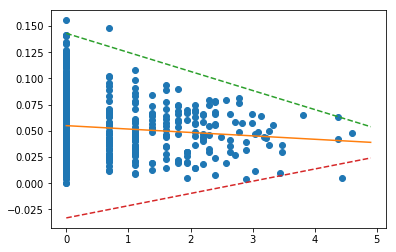

In [16]:
fig, ax = plt.subplots()
ax.plot(np.log(nchp),kudos/hits,'o')
x_grid = np.arange(0,50)/10.
ax.plot(x_grid,lg1.predict(x_grid.reshape(-1,1)),'-')
ax.plot(x_grid,3*lg2.predict(x_grid.reshape(-1,1))+lg1.predict(x_grid.reshape(-1,1)),'--')
ax.plot(x_grid,-3*lg2.predict(x_grid.reshape(-1,1))+lg1.predict(x_grid.reshape(-1,1)),'--')